<a href="https://colab.research.google.com/github/monocas/Machine-Learning----Queimadas-Cerrado/blob/main/Bloco_1_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **RISCO DE FOGO: QUEIMADAS NO CERRADO**
<hr>
<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 1, essencialmente, sobre como realizar a obtenção de dados por datasets e tratar estes. Todos os dados foram obtidos pelo dataset do INPE, o BDQueimadas. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. O grupo desenvolvedor é composto pelas discentes:

   <ul>
<li> 
Isabela Bento Beneti </li>
<li>
Monyque Karoline de Paula Silva </li>
<li>
Sofia Baccega C.C. de Oliveira </li>
<li>
Sophia Figueiredo Michel </li>
    </ul>


### **Início:**
<p align="justify">
Em um primento momento, iremos demonstrar o processo de tratamento dos dados obtidos via Database do INPE a respeito dos focos de incêndio ocorridos no Cerrado durante o período Janeiro-Dezembro(2021) e Janeiro-Novembro(2022). É necessário realizar as padronizações de bibliotecas inicias, como a Pandas, Seaborn e Matplotlib, posteriormente, trabalha-se os dados até a otimização destes para a análise dos atríbutos escolhidos.
</p>

### **Coleta:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from itertools import product
from matplotlib import pyplot as plt
from sklearn import tree

In [2]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fevereiro.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv', 'agosto.csv', 'setembro.csv', 'outubro.csv','novembro.csv', 'janeiro_2021.csv','fevereiro_2021.csv','março_2021.csv','abril_2021.csv','maio_2021.csv','junho_2021.csv','julho_2021.csv', 'agosto_2021.csv', 'setembro_2021.csv', 'outubro_2021.csv','novembro_2021.csv','dezembro_2021.csv']

In [3]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [4]:
meses = read_csv(arquivos)

In [5]:
#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

Eliminado as linhas dos dados não atribuidos(NaN), as desenvolvedoras optaram pelo uso do comando drop, do Pandas, de modo a selecionar as colunas não desejadas do arquvivo .csv, otimizando o processo de análise de dados.

In [6]:
## Para rodar o código pela primeira vez, descomente essas linhas

meses.drop(columns=['estado', 'municipio', 'pais', 'bioma'], axis = 1, inplace=True)

In [7]:
meses['satelite']= meses['datahora']
meses['satelite'] = meses['satelite'].str[11:13] #criando coluna "hora" a partir de "data_hora_gmt"
meses['datahora'] = meses['datahora'].str[5:7] #criando coluna "mes" a partir de "data_hora_gmt"
meses_fogo = meses['riscofogo'] > 0
meses.rename(columns={'satelite': 'hora'}, inplace= True)
meses.rename(columns={'datahora': 'mes'}, inplace = True)
meses = meses[meses_fogo]
meses.describe

<bound method NDFrame.describe of         mes hora  diasemchuva  precipitacao  riscofogo  latitude  longitude  \
0        01   17          4.0           3.7        0.2 -20.03711  -52.22083   
2        01   17          8.0           7.6        0.1 -20.15087  -52.07791   
39       01   16          2.0           0.8        0.1  -2.82439  -43.21342   
40       01   17          0.0           3.1        0.3 -15.05135  -56.54026   
41       01   17          2.0           0.1        0.1 -14.26308  -56.63799   
...      ..  ...          ...           ...        ...       ...        ...   
2999351  12   03         14.0           0.1        0.9  -4.81071  -43.16060   
2999352  12   03         14.0           0.1        1.0  -4.81119  -43.15772   
2999353  12   03          2.0           3.3        0.2  -4.98593  -43.77819   
2999354  12   03          2.0           3.3        0.2  -4.98646  -43.77510   
2999355  12   03         11.0           0.8        0.6  -5.10979  -43.11718   

          frp  
0

Realizada o processo de seleção de colunas, o próximo passo consiste na identificação dos tipos de dados utilizados em cada coluna e especificamente, em nosso caso, na identificação se dé fato só está sendo utilizado as variáveis numéricas.

In [8]:
meses.dtypes, meses.shape

(mes              object
 hora             object
 diasemchuva     float64
 precipitacao    float64
 riscofogo       float64
 latitude        float64
 longitude       float64
 frp             float64
 dtype: object,
 (2232518, 8))

In [9]:
meses["mes"] = meses["mes"].astype(float)
meses["hora"] = meses["hora"].astype(float)
print(meses.dtypes)

mes             float64
hora            float64
diasemchuva     float64
precipitacao    float64
riscofogo       float64
latitude        float64
longitude       float64
frp             float64
dtype: object


Alterando o tipo da coluna "data_hora_gmt" de string (object) para float

In [10]:
meses = meses.reset_index()
del meses['index']
display(meses)

,mes,hora,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,1.0,17.0,4.0,3.7,0.2,-20.03711,-52.22083,8.3
1,1.0,17.0,8.0,7.6,0.1,-20.15087,-52.07791,8.9
2,1.0,16.0,2.0,0.8,0.1,-2.82439,-43.21342,25.1
3,1.0,17.0,0.0,3.1,0.3,-15.05135,-56.54026,6.2
4,1.0,17.0,2.0,0.1,0.1,-14.26308,-56.63799,2.6
...,...,...,...,...,...,...,...,...
2232513,12.0,3.0,14.0,0.1,0.9,-4.81071,-43.16060,2.2
2232514,12.0,3.0,14.0,0.1,1.0,-4.81119,-43.15772,1.3
2232515,12.0,3.0,2.0,3.3,0.2,-4.98593,-43.77819,1.3
2232516,12.0,3.0,2.0,3.3,0.2,-4.98646,-43.77510,1.3


Realizada o procedimento de identificação dos tipos de dados existentes no código, inicia-se o processo de normalização de dados. Ela é ocorrente por meio do comando "zscore". Esse processo de normalização é extremamente importante para análises estátisticas, principalmente ao considerar que esse processo é remetente a transformação em escala da distribuição de uma variável para poder fazer comparações entre conjunto de elementos, evitando o efeito de influências.

In [11]:
#c_maximo = meses['numero_dias_sem_chuva'].max()
#c_minimo = meses['numero_dias_sem_chuva'].min()

#p_maximo = meses['precipitacao'].max()
#p_minimo = meses['precipitacao'].min()

#lat_maximo = meses['lat'].max()
#lat_minimo = meses['lat'].min()

#lon_maximo = meses['lon'].max()
#lon_minimo = meses['lon'].min()

#meses['numero_dias_sem_chuva'] = (meses['numero_dias_sem_chuva'] - c_minimo) / (c_maximo - c_minimo)
#meses['precipitacao'] = (meses['precipitacao'] - p_minimo) / (p_maximo - p_minimo)
#meses['lat'] = (meses['lat'] - lat_minimo) / (lat_maximo - lat_minimo)
#meses['lon'] = (meses['lon'] - lon_minimo) / (lon_maximo - lon_minimo)


#display(meses)

### **Análise de Dados**

De modo a analisar os dados obtidos, identifica-se informações estatísticas sobre cada amostra mensal de dados. Inicialmente, realiza-se o plot da descrição estátisca dos dados, como obter, por exemplo: a média e a moda. Em seguida, realiza-se o plot dos gráficos por meio de uma matriz de covariância e correlação entre os atríbutos para analisar as relações entre os atributos.

In [12]:
display(meses.describe())

,mes,hora,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,2.232518e+06,2.232518e+06,2.232518e+06,2.232518e+06,2.232518e+06,2.232518e+06,2.232518e+06,2.232518e+06
mean,8.474879e+00,1.277227e+01,3.495796e+01,2.555501e-01,9.073994e-01,-1.177759e+01,-4.743724e+01,2.923650e+01
std,1.680804e+00,5.867205e+00,9.182900e+01,1.408869e+00,2.255365e-01,4.417216e+00,3.535930e+00,6.563451e+01
min,1.000000e+00,0.000000e+00,-9.990000e+02,0.000000e+00,1.000000e-02,-2.467473e+01,-6.004722e+01,0.000000e+00
25%,8.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,-1.449990e+01,-4.905623e+01,3.600000e+00
50%,9.000000e+00,1.600000e+01,2.200000e+01,0.000000e+00,1.000000e+00,-1.149137e+01,-4.668105e+01,8.300000e+00
75%,1.000000e+01,1.700000e+01,7.100000e+01,0.000000e+00,1.000000e+00,-8.427993e+00,-4.478214e+01,2.480000e+01
max,1.200000e+01,2.300000e+01,8.360000e+02,9.272000e+01,1.000000e+00,-2.355490e+00,-4.152716e+01,9.612200e+03


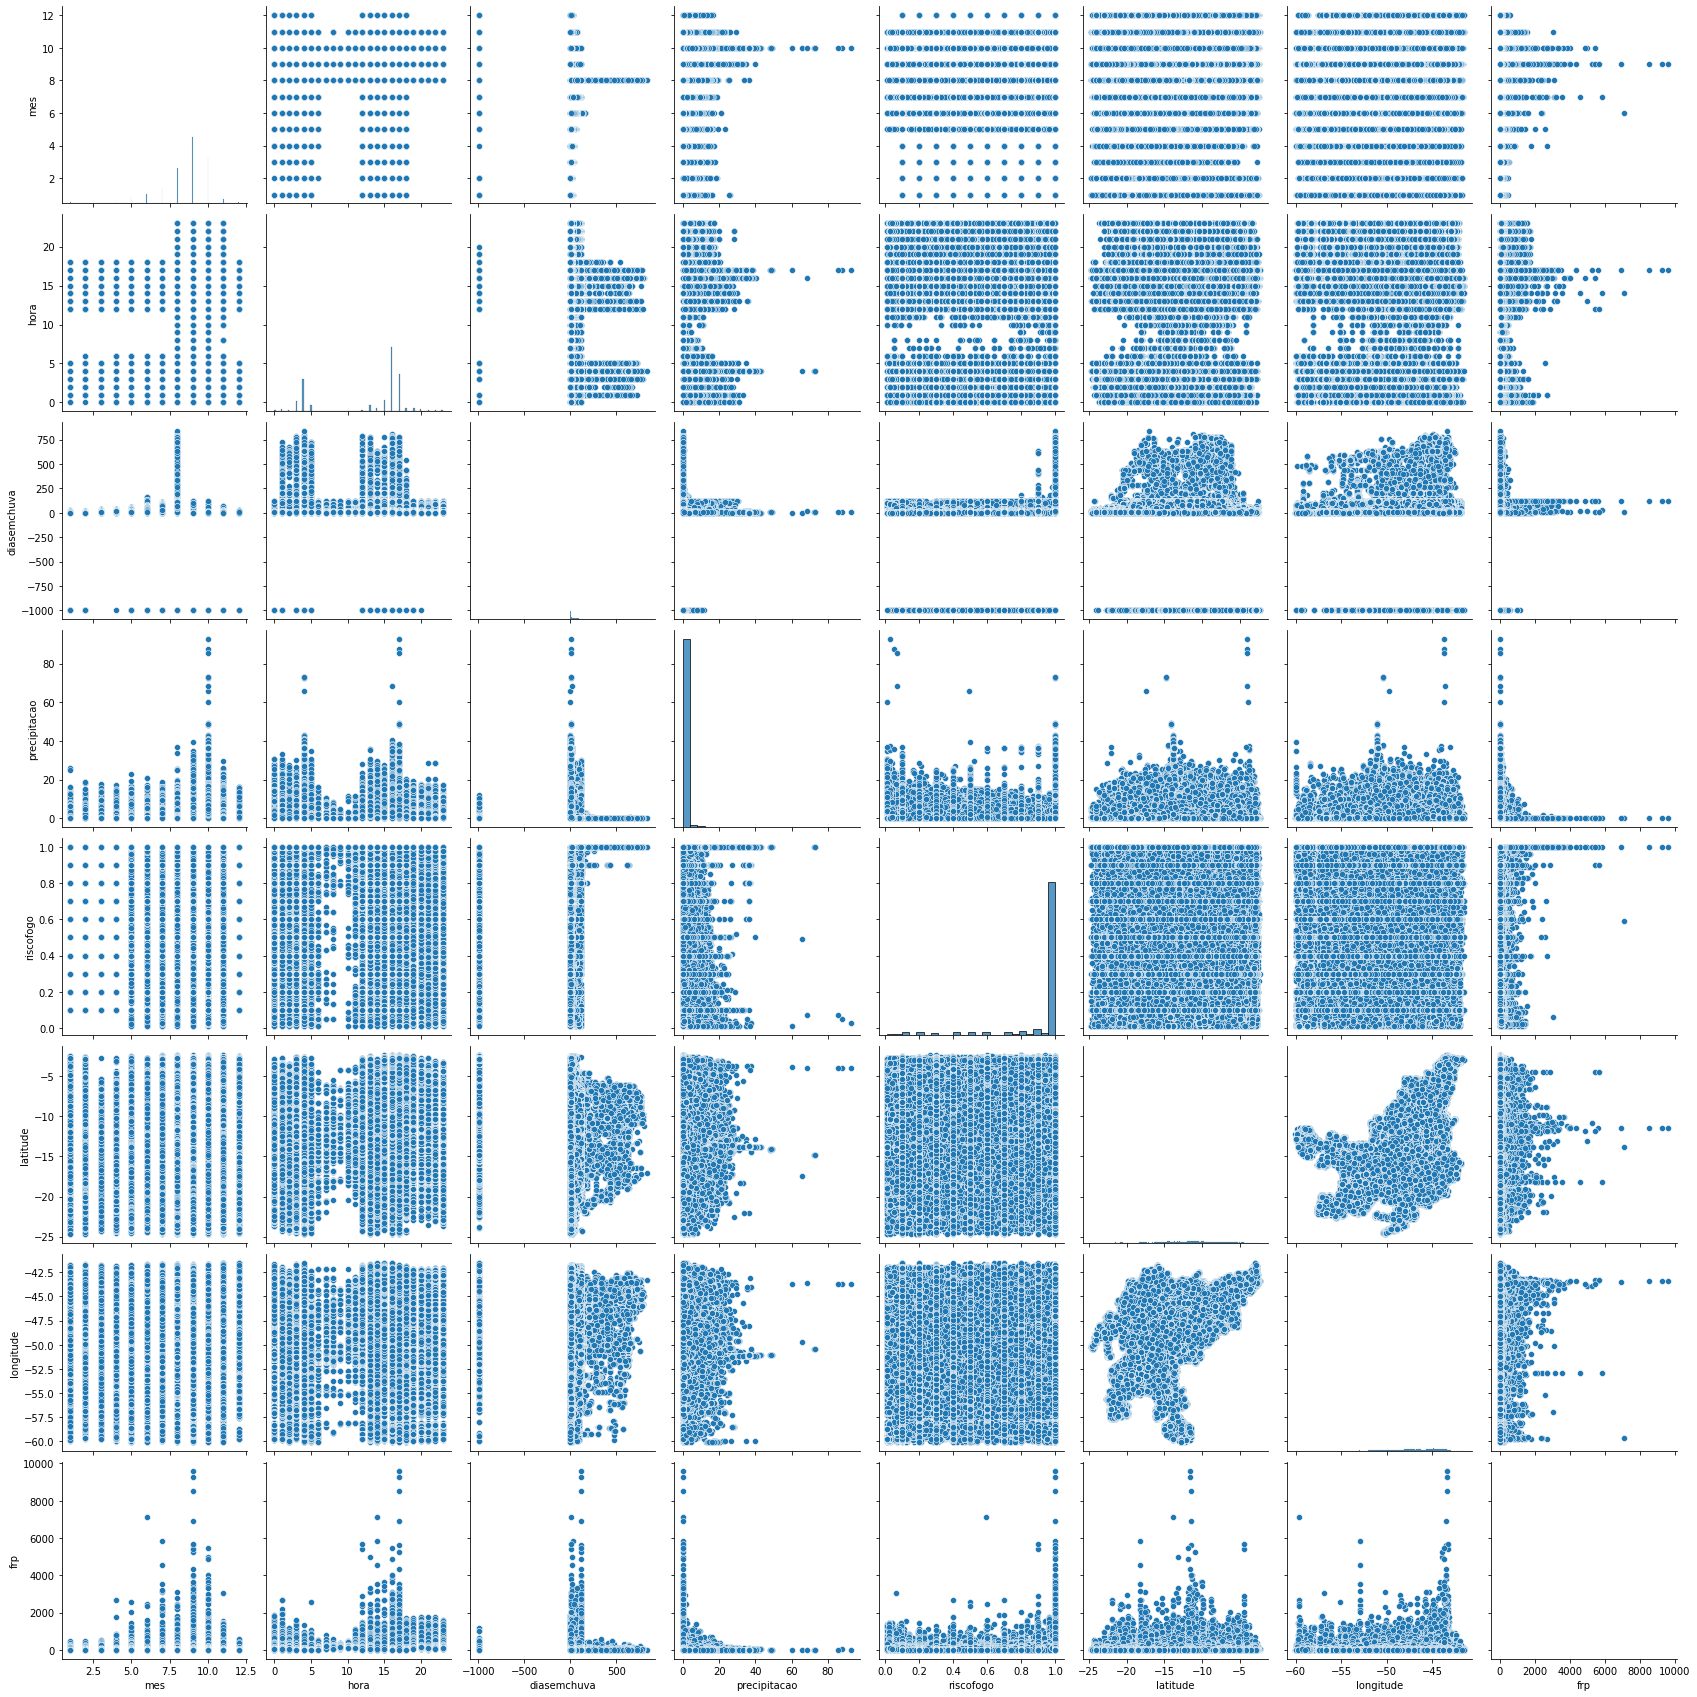

In [13]:
# Matriz de gráficos scatter 
sns.pairplot(meses, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [14]:
# Matriz de covâriancia
mes_covariancia = meses.cov()

# Matriz de correlação
mes_correlacao = meses.corr()

print('Matriz de covariância: ')
display(mes_covariancia)

print('\n\nMatriz de correlação: ')
display(mes_correlacao)

Matriz de covariância: 


,mes,hora,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
mes,2.825102,0.323947,4.282918,0.147844,0.037498,1.337210,1.077581,14.777085
hora,0.323947,34.424094,-16.704476,-0.450231,0.000730,2.813293,0.608353,74.701006
diasemchuva,4.282918,-16.704476,8432.565362,-4.650978,3.293821,-22.576647,4.610113,60.690285
precipitacao,0.147844,-0.450231,-4.650978,1.984911,-0.121307,-0.234150,-0.302317,-0.536723
riscofogo,0.037498,0.000730,3.293821,-0.121307,0.050867,0.020908,0.124710,0.498046
latitude,1.337210,2.813293,-22.576647,-0.234150,0.020908,19.511799,7.698476,14.486772
longitude,1.077581,0.608353,4.610113,-0.302317,0.124710,7.698476,12.502803,7.541164
frp,14.777085,74.701006,60.690285,-0.536723,0.498046,14.486772,7.541164,4307.888670




Matriz de correlação: 


,mes,hora,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
mes,1.000000,0.032849,0.027749,0.062433,0.098918,0.180108,0.181313,0.133949
hora,0.032849,1.000000,-0.031004,-0.054467,0.000552,0.108551,0.029324,0.193983
diasemchuva,0.027749,-0.031004,1.000000,-0.035950,0.159039,-0.055658,0.014198,0.010069
precipitacao,0.062433,-0.054467,-0.035950,1.000000,-0.381768,-0.037625,-0.060686,-0.005804
riscofogo,0.098918,0.000552,0.159039,-0.381768,1.000000,0.020987,0.156379,0.033645
latitude,0.180108,0.108551,-0.055658,-0.037625,0.020987,1.000000,0.492893,0.049968
longitude,0.181313,0.029324,0.014198,-0.060686,0.156379,0.492893,1.000000,0.032494
frp,0.133949,0.193983,0.010069,-0.005804,0.033645,0.049968,0.032494,1.000000


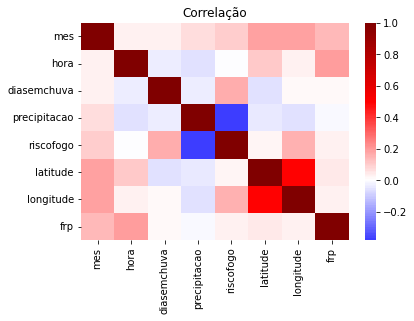

In [15]:
#Criando um mapa de cores dos valoes da correlação
sns.heatmap(mes_correlacao, 
        xticklabels=mes_correlacao.columns,
        yticklabels=mes_correlacao.columns,
           cmap='seismic',
           center = 0)

plt.title('Correlação')
plt.show()

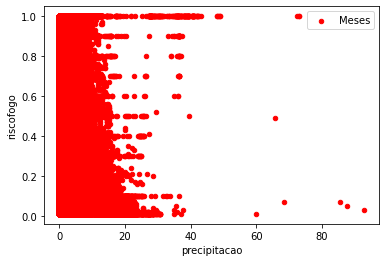

In [16]:
ax = meses.plot(kind='scatter', x="precipitacao", y="riscofogo", color='Red', label="Meses")

plt.show()

<AxesSubplot: ylabel='Frequency'>

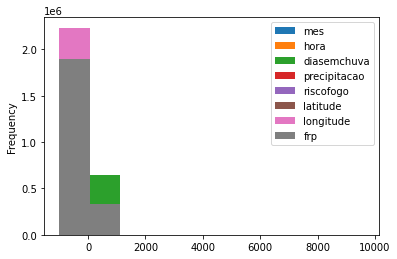

In [17]:
meses.plot(kind='hist')